In [65]:
%pylab inline
import pandas as pd

COUNTSFILE = "/storage/mlamkin/projects/eSTR-MPRA-analysis/cdna_gdna_analysis/cdna_gdna_counts_052120.txt"
METAFILE = "/storage/mlamkin/projects/eSTR-data/finalized_first_round_mpra_STR_v2.0_updated_labels.txt"

# Load counts file info
data = pd.read_csv(COUNTSFILE, sep="\t")

# Load tag meta data. Fix issue with neg/estr different format
meta_neg = pd.read_csv(METAFILE, delim_whitespace=True, skiprows=1, names=["Oligo_Type","Chrom","start","STR_pos","STR_end","Motif","Repeat_num", "F_primer","Var_seq","RE1","Filler","RE2","Tag","R_primer", "x"])
meta_neg = meta_neg[meta_neg["Oligo_Type"]=="Negative_Control"]
meta_pos = pd.read_csv(METAFILE, delim_whitespace=True, skiprows=1, names=["Oligo_Type","Chrom","start","STR_pos","STR_end","Gene","Motif","Repeat_num", "F_primer","Var_seq","RE1","Filler","RE2","Tag","R_primer"])
meta_pos = meta_pos[meta_pos["Oligo_Type"]=="eSTR"]
meta = pd.concat([meta_neg, meta_pos])
meta["STR_pos"] = (meta["STR_pos"]).apply(int)
meta["Repeat_num"] = (meta["Repeat_num"]).apply(int)

# Compute ratios
data["ratio_48hrs_rep1"] = data["cDNA_48hrs_rep1_counts"]/data["gDNA_rep1_counts"]
data["ratio_48hrs_rep2"] = data["cDNA_48hrs_rep2_counts"]/data["gDNA_rep2_counts"]

# Merge with meta data
data = pd.merge(data, meta[["Tag","Chrom","Motif","Oligo_Type","Repeat_num","STR_pos"]], on=["Tag"])

Populating the interactive namespace from numpy and matplotlib


/storage/resources/source/anaconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:15: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  from ipykernel import kernelapp as app


In [36]:
data.head()

,Tag,cDNA_48hrs_rep1_counts,cDNA_48hrs_rep2_counts,cDNA_72hrs_rep1_counts,cDNA_72hrs_rep2_counts,gDNA_rep1_counts,gDNA_rep2_counts,ratio_48hrs_rep1,ratio_48hrs_rep2,Motif,Oligo_Type,Repeat_num,STR_pos
0,AAAACAATAG,251.0,366.0,5.0,199.0,361.0,448.0,0.695291,0.816964,ATCT,eSTR,-4,131258994
1,AAAACATGTA,39.0,108.0,6.0,2.0,212.0,269.0,0.183962,0.401487,AGAT,eSTR,12,40574238
2,AAAACGTACA,105.0,167.0,3007.0,519.0,383.0,395.0,0.274151,0.422785,GT,eSTR,-44,64449525
3,AAAAGACCGT,556.0,762.0,72.0,195.0,403.0,475.0,1.379653,1.604211,A,eSTR,0,145136543
4,AAAAGCCCAT,343.0,172.0,0.0,1684.0,225.0,298.0,1.524444,0.577181,A,eSTR,-3,150719924


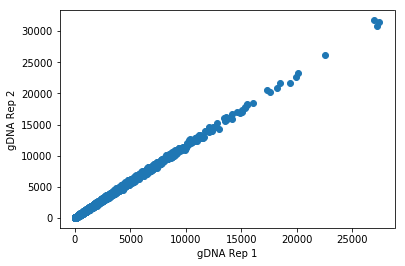

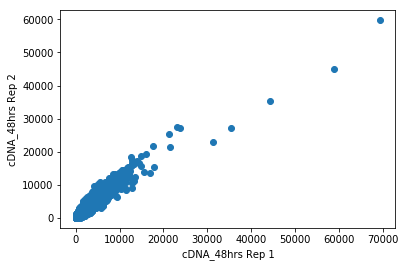

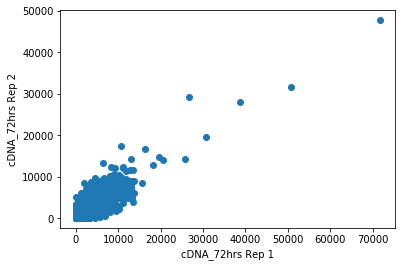

In [11]:
# Scatter plots for cDNA and gDNA counts
for prefix in ["gDNA", "cDNA_48hrs", "cDNA_72hrs"]:
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(data[prefix+"_rep1_counts"], data[prefix+"_rep2_counts"])
    ax.set_xlabel(prefix + " Rep 1")
    ax.set_ylabel(prefix + " Rep 2")

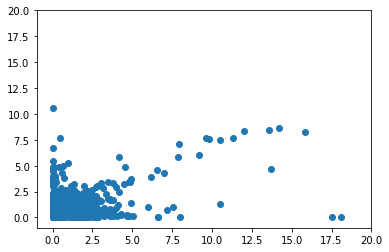

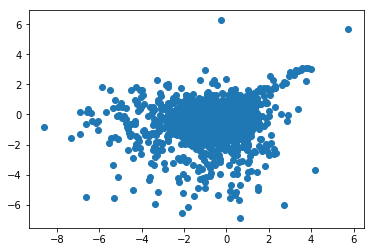

In [17]:
# Scatter plot of ratios - raw
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(data["ratio_48hrs_rep1"], data["ratio_48hrs_rep2"])
ax.set_xlim(left=-1, right=20)
ax.set_ylim(bottom=-1, top=20)

# Scatter plot of ratios - raw (log2)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(np.log2(data["ratio_48hrs_rep1"]), np.log2(data["ratio_48hrs_rep2"]))

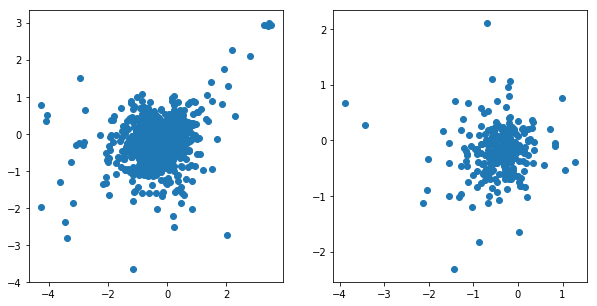

In [72]:
# Scatter plots - medians

# Filter data
data_filt = data[(data["gDNA_rep1_counts"]>=100) & (data["gDNA_rep2_counts"]>=100) &
                (data["cDNA_48hrs_rep1_counts"]>=10) & (data["cDNA_48hrs_rep2_counts"]>=10)]

# Get medians
data_med = data_filt.groupby(["Chrom","STR_pos","Repeat_num","Oligo_Type","Motif"], as_index=False).agg({"ratio_48hrs_rep1": np.median,
                                                      "ratio_48hrs_rep2": np.median})

fig = plt.figure()
fig.set_size_inches((10, 5))
ax = fig.add_subplot(121)
ax.scatter(np.log2(data_med[data_med["Oligo_Type"]=="eSTR"]["ratio_48hrs_rep1"]),
           np.log2(data_med[data_med["Oligo_Type"]=="eSTR"]["ratio_48hrs_rep2"]))
ax = fig.add_subplot(122)
ax.scatter(np.log2(data_med[data_med["Oligo_Type"]=="Negative_Control"]["ratio_48hrs_rep1"]),
           np.log2(data_med[data_med["Oligo_Type"]=="Negative_Control"]["ratio_48hrs_rep2"]))

In [73]:
data_filt[data_filt["STR_pos"]==25384460]

,Tag,cDNA_48hrs_rep1_counts,cDNA_48hrs_rep2_counts,cDNA_72hrs_rep1_counts,cDNA_72hrs_rep2_counts,gDNA_rep1_counts,gDNA_rep2_counts,ratio_48hrs_rep1,ratio_48hrs_rep2,Chrom,Motif,Oligo_Type,Repeat_num,STR_pos
178,AAGTATACAA,31306.0,22861.0,30801.0,19644.0,2308.0,2720.0,13.564125,8.404779,chr2,AGC,eSTR,18,25384460
688,AGCGTACAGA,12921.0,11868.0,13733.0,8952.0,1320.0,1560.0,9.788636,7.607692,chr2,AGC,eSTR,27,25384460
1231,CAAGTTTTAC,69396.0,59678.0,71727.0,47658.0,5763.0,7124.0,12.041645,8.377035,chr2,AGC,eSTR,27,25384460
1773,CTAAGTGGTT,12769.0,8986.0,12916.0,7179.0,806.0,1093.0,15.842432,8.221409,chr2,AGC,eSTR,0,25384460
2039,CTTTTGGGCA,58982.0,44904.0,50833.0,31501.0,6418.0,7390.0,9.190090,6.076319,chr2,AGC,eSTR,0,25384460
2644,GGAGATCACG,1576.0,886.0,1040.0,651.0,225.0,205.0,7.004444,4.321951,chr2,AGC,eSTR,-22,25384460
2789,GGGTTGCTGA,16965.0,13529.0,11070.0,12335.0,1619.0,1803.0,10.478691,7.503605,chr2,AGC,eSTR,9,25384460
2819,GGTGCTGAAT,401.0,276.0,239.0,174.0,370.0,511.0,1.083784,0.540117,chr2,AGC,eSTR,18,25384460
3198,TACGACCAGA,6719.0,5929.0,5565.0,6989.0,696.0,768.0,9.653736,7.720052,chr2,AGC,eSTR,0,25384460
3439,TGACCATATT,35382.0,27288.0,26760.0,29241.0,2491.0,3155.0,14.203934,8.649128,chr2,AGC,eSTR,9,25384460


In [75]:
data_med.sort_values("ratio_48hrs_rep1", ascending=False)

,Chrom,STR_pos,Repeat_num,Oligo_Type,Motif,ratio_48hrs_rep1,ratio_48hrs_rep2
1091,chr2,25384460,18,eSTR,AGC,11.292720,7.708306
1092,chr2,25384460,27,eSTR,AGC,10.915141,7.992364
1090,chr2,25384460,9,eSTR,AGC,10.478691,7.503605
1089,chr2,25384460,0,eSTR,AGC,9.653736,7.720052
1088,chr2,25384460,-22,eSTR,AGC,7.004444,4.321951
...,...,...,...,...,...,...,...
322,chr10,100394278,-4,Negative_Control,AAAC,0.068323,1.588652
693,chr12,109910317,0,eSTR,A,0.060489,1.434884
1345,chr4,120035967,-6,eSTR,ATT,0.059322,1.268012
1670,chr9,125065560,2,eSTR,AT,0.052632,1.727941


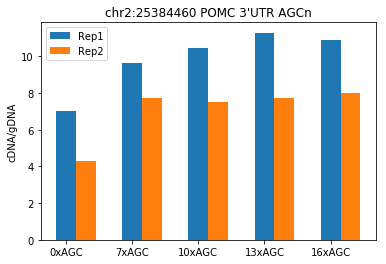

In [94]:
# POMC example
pomc_example = data_med[data_med["STR_pos"]==25384460].sort_values("Repeat_num")

offset = min(pomc_example["Repeat_num"])

fig = plt.figure()
ax = fig.add_subplot(111)
ax.bar(range(pomc_example.shape[0]), pomc_example["ratio_48hrs_rep1"], width=0.3, label="Rep1")
ax.bar([item+0.3 for item in range(pomc_example.shape[0])], pomc_example["ratio_48hrs_rep2"], width=0.3, label="Rep2");
ax.legend(loc="upper left")
ax.set_xticks(range(pomc_example.shape[0]))
ax.set_xticklabels(["%sxAGC"%(int((item-offset)/3)) for item in pomc_example["Repeat_num"]])
ax.set_ylabel("cDNA/gDNA");
ax.set_title("chr2:25384460 POMC 3'UTR AGCn");